<a href="https://colab.research.google.com/github/moaaztaha/Arabic-Image-Captioning-Demo/blob/main/Demo_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from ipywidgets import FileUpload
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import os

def setup():
    print("Cloning repos....")
    os.system("git clone https://github.com/moaaztaha/Arabic-Image-Captioning-Demo")
    os.system("git clone https://github.com/aub-mind/arabert")
    os.system("mv  -v /content/Arabic-Image-Captioning-Demo/* .")
    os.system("pip install -r requirements.txt")
    warnings.filterwarnings("ignore")
setup()

Cloning repos....


In [6]:
# updating dgown before downloading files from gdrive
!pip install --upgrade --no-cache-dir gdown --quiet

# supporting arabic text for matplotlib
!pip install python-bidi --quiet
!pip install arabic-reshaper --quiet

In [14]:
from caption import caption_image, caption_image_viz, visualize_att

In [5]:
# downloading the model

if Path('BEST_checkpoint_flickr8k_ar_arabert_pretrained_finetune.pth.tar').is_file():
    print("Arabert Model file exists!!!")
else:
    print("Downloading Arabert model...")
    os.system('gdown --id 1-6o5yt2oMrgJBlKA_pToQqXpntI-ZYoB')
if Path('BEST_checkpoint_flickr8k_ar_pretrained_finetune.pth.tar').is_file():
    print("Old Model file exists!!!")
else:
    print("Downloading Old model...")
    os.system('gdown --id 1-3yPtc-7esopr7dAEMz1G4oBeHdhMc9n')

#https://drive.google.com/file/d/1-qBVIkuJfN2aAR-Z39wqzjpJNbhOfkuh/view?usp=sharing
if Path('BEST_checkpoint_flickr8k_finetune.pth.tar').is_file():
    print("English Model file exists!!!")
else:
    print("Downloading English model...")
    os.system('gdown --id 1-qBVIkuJfN2aAR-Z39wqzjpJNbhOfkuh')


Arabert Model file exists!!!
Old Model file exists!!!
English Model file exists!!!


# The model trained using Simple Preprocessing 
## Captioning an image
- if you want to try the english model, set the `eng` to `True`

In [20]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [22]:
# True for English, False for Arabic
eng=True

100%|██████████| 40000/40000 [00:00<00:00, 226435.78it/s]


----------------------------------------------------------------------------------------------------
a black and white dog is running through the grass


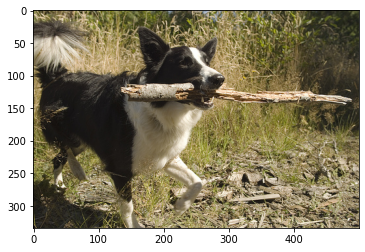

In [23]:
old = True
output = caption_image(upload, old=old, eng=eng)
if len(upload.data):
  img=plt.imread("test.png", 0)
  plt.imshow(img)
  # plt.title(output)
  print("-"*100)
  print(output)
else:
  print("Upload an image!!!")

# Caption with Visualization

In [ ]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
# True for English, False for Arabic
eng=True

[2022-05-27 13:59:57,380 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.
100%|██████████| 40000/40000 [00:00<00:00, 223971.85it/s]


********** Best Captions **********
a black and white dog is running through the grass
a black and white dog is running with a stick in its mouth
a black and white dog is running through the grass with a stick in its mouth
*************************************


100%|██████████| 40000/40000 [00:00<00:00, 248925.66it/s]


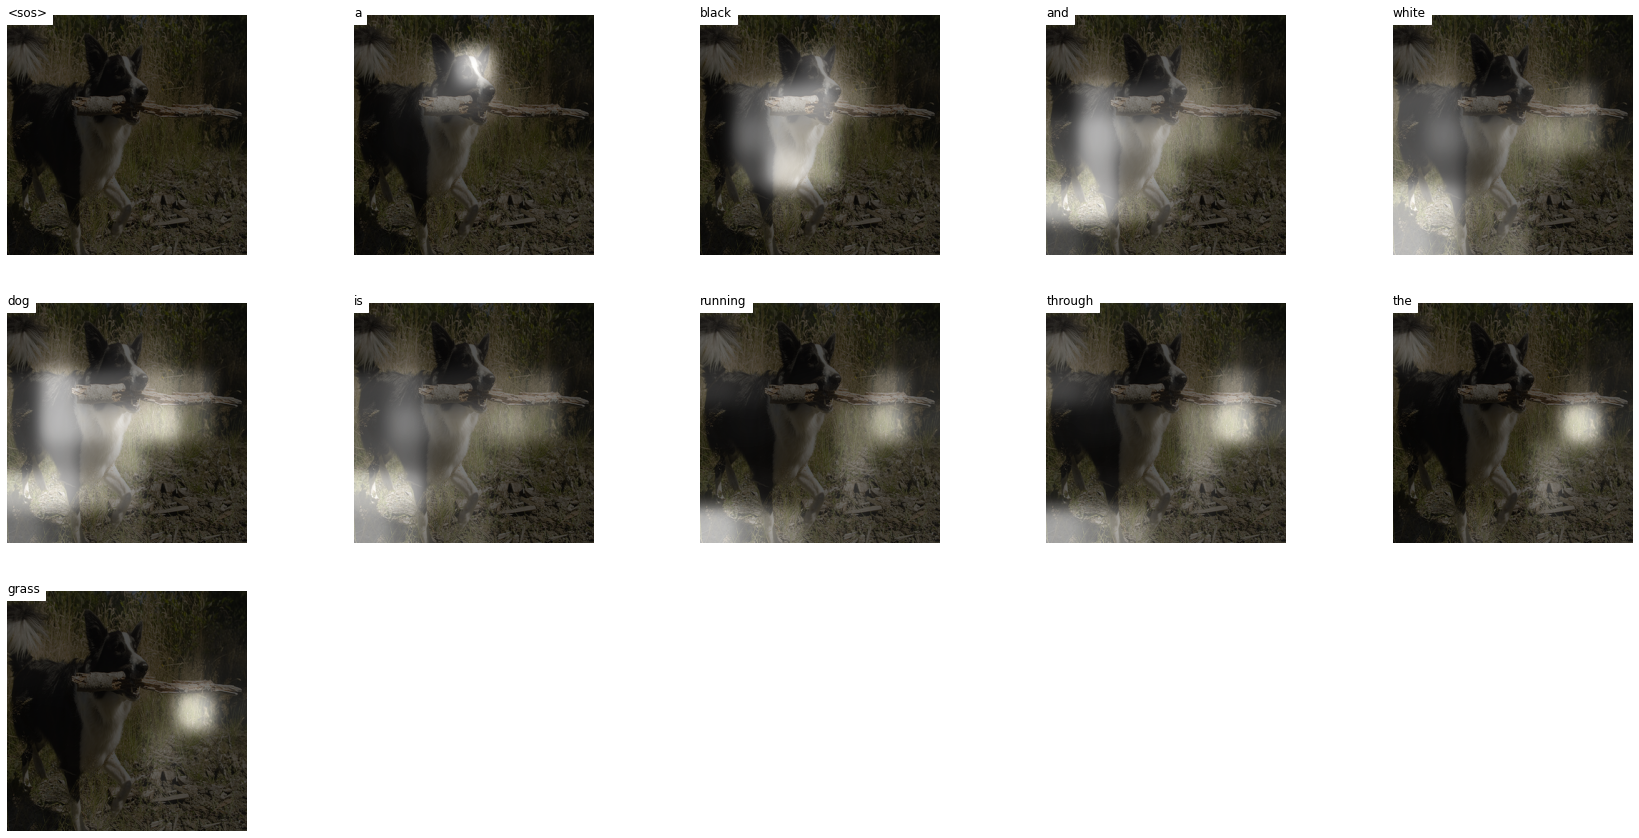

In [29]:
if len(upload.data):
  old = True
  alphas, seq, all_caps = caption_image_viz(upload, old=old, eng=eng)
  print("********** Best Captions **********")
  for c in all_caps:
    print(c)
  print("*************************************")
  visualize_att(seq, alphas, old=old, eng=eng)
else:
  print("Upload an image !!")

# The model trained using AraBert Preprocessing 
## Captioning an image

In [ ]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 175678.27it/s]


----------------------------------------------------------------------------------------------------
فتاة صغيرة صغيرة صغيرة القدم


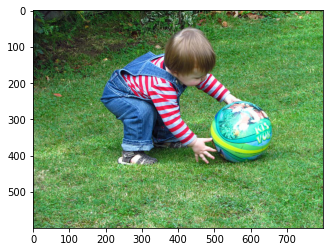

In [ ]:
old = False
output = caption_image(upload, old=old)
if len(upload.data):
  img=plt.imread("test.png", 0)
  plt.imshow(img)
  # plt.title(output)
  print("-"*100)
  print(output)
else:
  print("Upload an image!!!")

# Caption with Visualization

In [ ]:
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

100%|██████████| 24000/24000 [00:00<00:00, 167012.81it/s]


********** Best Captions **********
رجل يرتدي قميص + ا أحمر و + أسود + ا
رجل يرتدي قميص + ا أحمر و + ال + لون ال + أحمر
رجل يرتدي قميص + ا أحمر و + ال + لون ال + أحمر و + ال + أسود
*************************************


100%|██████████| 24000/24000 [00:00<00:00, 163288.79it/s]


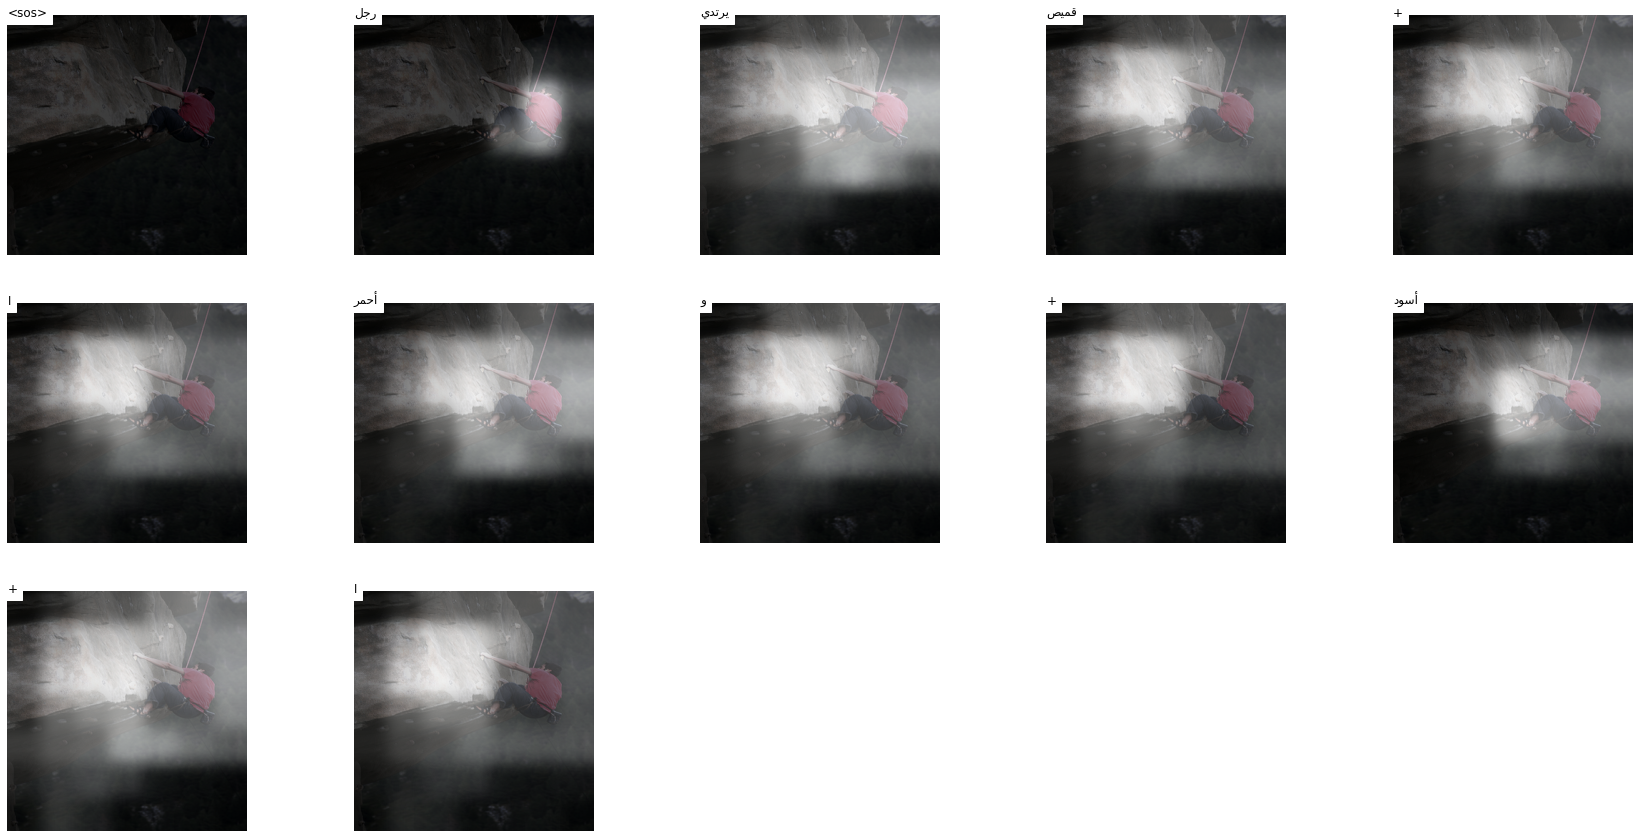

In [12]:
if len(upload.data):
  old = False
  alphas, seq, all_caps = caption_image_viz(upload, old=old)
  print("********** Best Captions **********")
  for c in all_caps:
    print(c)
  print("*************************************")
  visualize_att(seq, alphas, old=old)
else:
  print("Upload an image !!")